<a href="https://colab.research.google.com/github/Atishmondi/Customer-Segmentation/blob/main/customer_segementation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Shopping_data.csv

/content/drive/MyDrive/Shopping_data.csv


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/Shopping_data.csv")

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

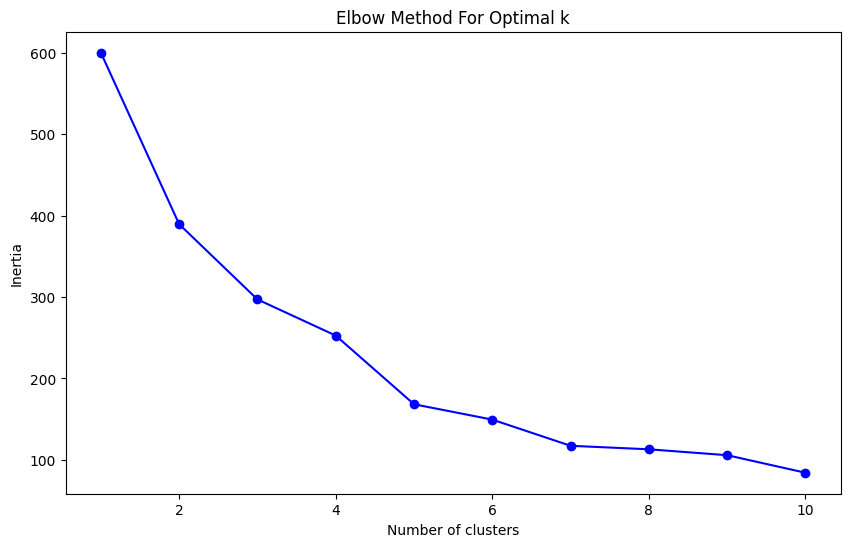

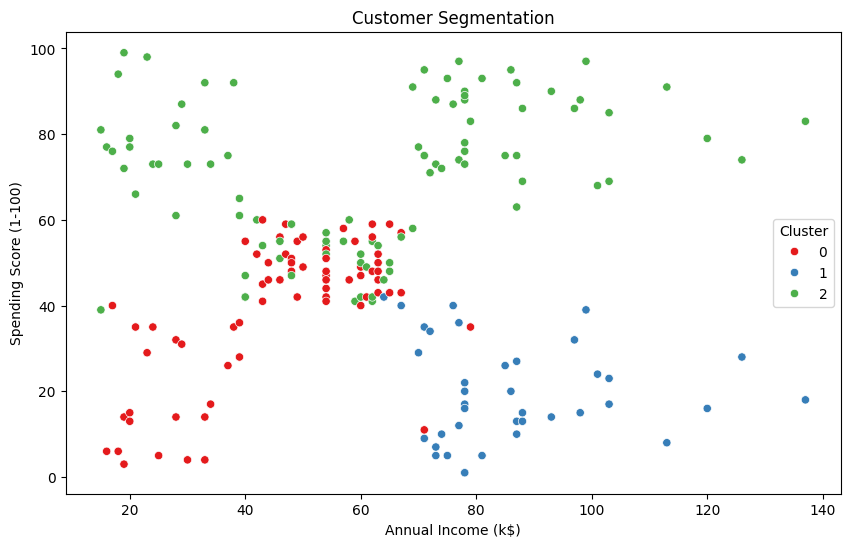

Cluster Summary (Numeric Features):
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         66.057971  52.608696           46.072464               39.333333
1        160.552632  39.368421           86.500000               19.578947
2        101.516129  28.430108           60.709677               70.774194

Gender Counts in Each Cluster:
Genre    Female  Male
Cluster              
0            40    29
1            19    19
2            53    40


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Shopping_data.csv")

# Quick overview of the dataset
print(df.head())
print(df.describe())

# Selecting relevant features for segmentation
# Here, we're using 'Annual Income (k$)', 'Spending Score (1-100)', and 'Age' for segmentation
features = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Age']]

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Finding the optimal number of clusters using the elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Choosing the optimal number of clusters (e.g., from elbow plot) and fitting the model
optimal_clusters = 3  # Replace this with the number found from elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the clusters with a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Summary of each cluster's characteristics (numeric features only)
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("Cluster Summary (Numeric Features):")
print(cluster_summary)

# Optional: Display count of each gender within each cluster
gender_counts = df.groupby(['Cluster', 'Genre']).size().unstack().fillna(0)
print("\nGender Counts in Each Cluster:")
print(gender_counts)
